<a href="https://colab.research.google.com/github/leochoo/audiocnn/blob/main/notebooks/dev_DysphoniaSVD_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check GPU Info
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jul  8 06:11:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data Info
Put all audio files in one directory, use metadata to label

# Mount Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/CompressedData/

all_audio.tar.gz	   DysphoniaSVD-TAR.tar.gz  UrbanSound8K.tar.gz
DysphoniaSVD-metadata.csv  Test.tar.gz


In [ ]:
!ls /content/

gdrive	sample_data


In [ ]:
# unzip and move it to VM disk provided by colab
!tar -xvzf /content/gdrive/MyDrive/CompressedData/all_audio.tar.gz -C /content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
all_audio/._743-a_l.wav
all_audio/743-a_l.wav
all_audio/._1098-i_h.wav
all_audio/1098-i_h.wav
all_audio/._1694-a_h.wav
all_audio/1694-a_h.wav
all_audio/._2091-a_l.wav
all_audio/2091-a_l.wav
all_audio/._1394-i_n.wav
all_audio/1394-i_n.wav
all_audio/._1050-u_n.wav
all_audio/1050-u_n.wav
all_audio/._1088-i_h.wav
all_audio/1088-i_h.wav
all_audio/._2186-i_n.wav
all_audio/2186-i_n.wav
all_audio/._29-u_n.wav
all_audio/29-u_n.wav
all_audio/._2431-u_l.wav
all_audio/2431-u_l.wav
all_audio/._998-i_n.wav
all_audio/998-i_n.wav
all_audio/._1066-u_l.wav
all_audio/1066-u_l.wav
all_audio/._1471-u_h.wav
all_audio/1471-u_h.wav
all_audio/._116-a_l.wav
all_audio/116-a_l.wav
all_audio/._1887-u_l.wav
all_audio/1887-u_l.wav
all_audio/._838-u_h.wav
all_audio/838-u_h.wav
all_audio/._950-u_h.wav
all_audio/950-u_h.wav
all_audio/._1076-u_l.wav
all_audio/1076-u_l.wav
all_audio/._988-i_n.wav
all_audio/988-i_n.wav
all_audio/._2417-u_n.wav
all_audio/2417-u_n.wav
all_audio/._1958-a_h

In [ ]:
!ls /content/

all_audio  gdrive  sample_data


In [ ]:
!ls /content/all_audio | wc -l

7532


## Loading files separated by folders

In [ ]:
# !tar -xvzf /content/gdrive/MyDrive/CompressedData/DysphoniaSVD-TAR.tar.gz -C /content/

In [ ]:
# # file numbers count
# !ls /content/DysphoniaSVD/healthy/ | wc -l
# !ls /content/DysphoniaSVD/pathological/hyperfunctional/ | wc -l
# !ls /content/DysphoniaSVD/pathological/functional/ | wc -l
# !ls /content/DysphoniaSVD/pathological/organic/ | wc -l
# !ls /content/DysphoniaSVD/pathological/psychogenic/ | wc -l

# Prepare Data

In [ ]:
# ----------------------------
# Prepare training data from Metadata file
# ----------------------------
import pandas as pd
from pathlib import Path

download_path = Path("/content/all_audio")
download_path

PosixPath('/content/all_audio')

In [ ]:
metadata_file = "/content/gdrive/MyDrive/CompressedData/DysphoniaSVD-metadata.csv"

In [ ]:
df = pd.read_csv(metadata_file)
df.head()

,Name,Type,Tone,Syllab,Jitter,Shimmer,HNR,MFCC-0,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-0_d1,MFCC-1_d1,MFCC-2_d1,MFCC-3_d1,MFCC-4_d1,MFCC-5_d1,MFCC-6_d1,MFCC-7_d1,MFCC-8_d1,MFCC-9_d1,MFCC-10_d1,MFCC-11_d1,MFCC-0_d2,MFCC-1_d2,MFCC-2_d2,MFCC-3_d2,MFCC-4_d2,MFCC-5_d2,MFCC-6_d2,MFCC-7_d2,MFCC-8_d2,MFCC-9_d2,MFCC-10_d2,MFCC-11_d2
0,743-u_n,healthy,n,u,1.164692,0.042058,24.772758,21.736319,17.458524,7.820948,3.013962,-0.112737,-1.432067,-2.090402,-0.902548,-1.105970,-0.213774,-0.363193,-0.486611,6.521789,5.231913,2.343208,0.904152,-0.032224,-0.429184,-0.625719,-0.271349,-0.334285,-0.067808,-0.111681,-0.149277,1.956948,1.569280,0.702141,0.270776,-0.009505,-0.128288,-0.186863,-0.080942,-0.100158,-0.020964,-0.034327,-0.045887
1,56-i_n,healthy,n,i,0.155393,0.011061,26.922863,23.644426,10.189441,4.770982,5.767449,1.589007,-0.705619,1.437949,0.552991,-0.956424,0.195257,-0.884919,0.097724,7.092325,3.062856,1.437097,1.731579,0.478046,-0.211122,0.427814,0.165692,-0.288701,0.056786,-0.266306,0.029251,2.127396,0.921045,0.430543,0.518259,0.143927,-0.062734,0.127002,0.049976,-0.086409,0.016862,-0.080224,0.008735
2,39-a_l,healthy,l,a,0.224576,0.027684,27.151732,22.485759,17.417019,2.881103,-1.048527,-3.289772,-3.634941,4.378751,0.137553,-2.093616,0.072519,-0.990220,-0.689315,6.742517,5.243871,0.877349,-0.310876,-0.987234,-1.096360,1.312841,0.034700,-0.635062,0.019845,-0.297272,-0.201893,2.021781,1.574225,0.264445,-0.091457,-0.292316,-0.328552,0.389849,0.009098,-0.191274,0.004799,-0.089539,-0.059719
3,29-a_l,healthy,l,a,0.498826,0.038859,20.022510,22.026267,15.125506,0.457665,-1.227691,-4.545792,-3.290087,0.705042,1.368142,1.190913,1.944803,-1.490690,0.119717,6.606848,4.538361,0.142543,-0.360637,-1.361223,-0.985173,0.208280,0.409745,0.368633,0.589462,-0.453296,0.022541,1.981699,1.358911,0.047697,-0.107558,-0.409835,-0.297088,0.062504,0.123028,0.112664,0.175903,-0.137256,0.002436
4,46-i_n,healthy,n,i,0.532008,0.023150,22.705093,22.937200,8.484145,6.262272,6.895974,2.157817,-2.048918,0.372489,1.673992,-2.392016,-0.219316,-0.520939,-0.672134,6.880962,2.544763,1.878621,2.066439,0.649575,-0.614199,0.112905,0.500854,-0.717387,-0.070862,-0.157676,-0.198866,2.064314,0.763665,0.562402,0.618542,0.195190,-0.183320,0.034640,0.149443,-0.214998,-0.022542,-0.047958,-0.059465


In [ ]:
df.shape

(7810, 43)

In [ ]:
df["Type"].value_counts()

healthy            3158
hyperfunctional    1916
functional         1008
organic             909
psychogenic         819
Name: Type, dtype: int64

### I need to figure out why these numbers don't match up later...
Perhaps something went wrong when generating my metadata..?

In [ ]:
df = df[['Name', 'Type']]
df

,Name,Type
0,743-u_n,healthy
1,56-i_n,healthy
2,39-a_l,healthy
3,29-a_l,healthy
4,46-i_n,healthy
...,...,...
7805,151-a_l,psychogenic
7806,366-u_n,psychogenic
7807,741-a_h,psychogenic
7808,366-u_l,psychogenic


In [ ]:
df['relative_path'] = '/' + df['Name'].astype(str) + '.wav'
df['relative_path'].head()

0    /743-u_n.wav
1     /56-i_n.wav
2     /39-a_l.wav
3     /29-a_l.wav
4     /46-i_n.wav
Name: relative_path, dtype: object

In [ ]:
# Take relevant columns
df = df[['relative_path', 'Type']]
df.head()

,relative_path,Type
0,/743-u_n.wav,healthy
1,/56-i_n.wav,healthy
2,/39-a_l.wav,healthy
3,/29-a_l.wav,healthy
4,/46-i_n.wav,healthy


In [ ]:
# ddf = df
# ddf.loc[ddf["Type"] == "healthy", "Type"] = 0
# ddf

In [ ]:
# replace Type label from string to float
df["Type"] = df["Type"].replace("healthy", 0)
df["Type"] = df["Type"].replace("hyperfunctional", 1)
df["Type"] = df["Type"].replace("functional", 2)
df["Type"] = df["Type"].replace("organic", 3)
df["Type"] = df["Type"].replace("psychogenic", 4)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df

,relative_path,Type
0,/743-u_n.wav,0
1,/56-i_n.wav,0
2,/39-a_l.wav,0
3,/29-a_l.wav,0
4,/46-i_n.wav,0
...,...,...
7805,/151-a_l.wav,4
7806,/366-u_n.wav,4
7807,/741-a_h.wav,4
7808,/366-u_l.wav,4


# Pre-processing

In [ ]:
!pip3 install torch torchvision torchaudio

     |████████████████████████████████| 1.9MB 8.4MB/s 


In [ ]:
# preprocessing
import math
import random
import torch
from torchaudio import transforms
from IPython.display import Audio


class AudioUtil():
    # ----------------------------
    # Load an audio file. Return the signal as a tensor and the sample rate
    # ----------------------------
    @staticmethod
    def open(audio_file):
        sig, sr = torchaudio.load(audio_file)
        return (sig, sr)

    # ----------------------------
    # Convert the given audio to the desired number of channels
    # ----------------------------
    @staticmethod
    def rechannel(aud, new_channel):
        sig, sr = aud

        if (sig.shape[0] == new_channel):
            # Nothing to do;
            return aud

        if (new_channel == 1):
            # Convert from stereo to mono by selecting only the first channel
            resig = sig[:1, :]
        else:
            # Convert from mono to stereo by duplicating the first channel
            resig = torch.cat([sig, sig])

        return ((resig, sr))

    # ----------------------------
    # Since Resample applies to a single channel, we resample one channel at a time
    # ----------------------------
    @staticmethod
    def resample(aud, newsr):
        sig, sr = aud

        if (sr == newsr):
            # Nothing to do
            return aud

        num_channels = sig.shape[0]
        # Resample first channel
        resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1, :])
        if (num_channels > 1):
            # Resample the second channel and merge both channels
            retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:, :])
            resig = torch.cat([resig, retwo])

        return ((resig, newsr))

    # ----------------------------
    # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
    # ----------------------------

    @staticmethod
    def pad_trunc(aud, max_ms):
        sig, sr = aud
        num_rows, sig_len = sig.shape
        max_len = sr//1000 * max_ms

        if (sig_len > max_len):
            # Truncate the signal to the given length
            sig = sig[:, :max_len]

        elif (sig_len < max_len):
            # Length of padding to add at the beginning and end of the signal
            pad_begin_len = random.randint(0, max_len - sig_len)
            pad_end_len = max_len - sig_len - pad_begin_len

            # Pad with 0s
            pad_begin = torch.zeros((num_rows, pad_begin_len))
            pad_end = torch.zeros((num_rows, pad_end_len))

            sig = torch.cat((pad_begin, sig, pad_end), 1)

        return (sig, sr)

    # ----------------------------
    # Shifts the signal to the left or right by some percent. Values at the end
    # are 'wrapped around' to the start of the transformed signal.
    # ----------------------------
    @staticmethod
    def time_shift(aud, shift_limit):
        sig, sr = aud
        _, sig_len = sig.shape
        shift_amt = int(random.random() * shift_limit * sig_len)
        return (sig.roll(shift_amt), sr)

    # ----------------------------
    # Generate a Spectrogram
    # ----------------------------
    @staticmethod
    def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
        sig, sr = aud
        top_db = 80

        # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
        spec = transforms.MelSpectrogram(
            sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

        # Convert to decibels
        spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
        return (spec)

    # ----------------------------
    # MASKING
    # Augment the Spectrogram by masking out some sections of it in both the frequency
    # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
    # overfitting and to help the model generalise better. The masked sections are
    # replaced with the mean value.
    # ----------------------------
    @staticmethod
    def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
        _, n_mels, n_steps = spec.shape
        mask_value = spec.mean()
        aug_spec = spec

        freq_mask_param = max_mask_pct * n_mels
        for _ in range(n_freq_masks):
            aug_spec = transforms.FrequencyMasking(
                freq_mask_param)(aug_spec, mask_value)

        time_mask_param = max_mask_pct * n_steps
        for _ in range(n_time_masks):
            aug_spec = transforms.TimeMasking(
                time_mask_param)(aug_spec, mask_value)

        return aug_spec


# Define Custom Data Loader

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------

class SoundDS(Dataset):
    def __init__(self, df):
        self.df = df
        # self.data_path = str(data_path)
        self.duration = 4000
        self.sr = 50000
        self.channel = 2
        self.shift_pct = 0.4

    # ----------------------------
    # Number of items in dataset
    # ----------------------------
    def __len__(self):
        return len(self.df)

    # ----------------------------
    # Get i'th item in dataset
    # ----------------------------
    def __getitem__(self, idx):

        # dynamic processing
        preprocessed_audio = self.df.loc[idx, 'processed']
        class_id = self.df.loc[idx, 'Type']
        
        shift_aud = AudioUtil.time_shift(preprocessed_audio, self.shift_pct)
        sgram = AudioUtil.spectro_gram(
            shift_aud, n_mels=64, n_fft=1024, hop_len=None)
        aug_sgram = AudioUtil.spectro_augment(
            sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

        return aug_sgram, class_id


In [ ]:
import numpy as np
from tqdm.notebook import tqdm
from pathlib import Path

def static_preprocessing(df, data_path):
    duration = 4000
    sr = 50000
    channel = 2
    shift_pct = 0.4

    processed_audio_files = np.empty((len(df)), dtype=object)

    for idx in tqdm(range(len(df))):
        # open and perform static processing
        audio_file = data_path + df.loc[idx, 'relative_path']
        # 210707 checking if the file exists. but lemme test if the below is necesary
        # if Path(audio_file).exists(): 
        aud = AudioUtil.open(audio_file)
        reaud = AudioUtil.resample(aud, sr)
        rechan = AudioUtil.rechannel(reaud, channel)
        dur_aud = AudioUtil.pad_trunc(rechan, duration)
        
        # store in side new np.array
        processed_audio_files[idx] = dur_aud
        

    # concatenate processed_audio and Type into a new dataframe
    processed_df = pd.DataFrame(np.column_stack((processed_audio_files, df["Type"])),
    columns=["processed", "Type"])
    return processed_df



    return processed_df


# Prepare Batches of Data with the Data Loader

In [ ]:
from torch.utils.data import random_split

processed_dataset = static_preprocessing(df, "/content/all_audio")



In [ ]:
# Get dataset loadable by PyTorch
myds = SoundDS(processed_dataset)

In [ ]:
# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

In [ ]:
# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=128, shuffle=False)

# Create Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------

class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(
            5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(
            3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Third Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(
            3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Fourth Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(
            3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier 
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=5)


        # TODO: maybe it shouldn't be linear but use softmax classifier?

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)

    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x


# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device


device(type='cuda', index=0)

# Training

In [ ]:
# ----------------------------
# Training Loop
# ----------------------------


def training(model, train_dl, num_epochs):
    # Loss Function, Optimizer and Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.002,
                                                    steps_per_epoch=int(
                                                        len(train_dl)),
                                                    epochs=num_epochs,
                                                    anneal_strategy='linear')
    
    train_losses = []
    train_accs = []

    # Repeat for each epoch
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

        # Repeat for each batch in the training set
        for i, data in enumerate(tqdm(train_dl)):
            # Get the input features and target labels, and put them on the GPU
            # print("Data type: ", type(data[0]), type(data[1]))
            # print("Data label: ", data[1])
            inputs, labels = data[0].to(device), data[1].to(device)

            # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

            # Zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            # Keep stats for Loss and Accuracy
            running_loss += loss.item()

            # Get the predicted class with the highest score
            _, prediction = torch.max(outputs, 1)
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

            # if i % 10 == 0:    # print every 10 mini-batches
            #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))

        # Print stats at the end of the epoch
        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches
        acc = correct_prediction/total_prediction
        train_losses.append(avg_loss)
        train_accs.append(acc)
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

    print('Finished Training')
    return train_losses, train_accs

In [ ]:
num_epochs = 200   # Just for demo, adjust this higher.
t_loss, t_acc = training(myModel, train_dl, num_epochs)


Epoch: 0, Loss: 1.61, Accuracy: 0.22



Epoch: 1, Loss: 1.59, Accuracy: 0.25



Epoch: 2, Loss: 1.58, Accuracy: 0.29



Epoch: 3, Loss: 1.56, Accuracy: 0.32



Epoch: 4, Loss: 1.54, Accuracy: 0.36



Epoch: 5, Loss: 1.52, Accuracy: 0.38



Epoch: 6, Loss: 1.50, Accuracy: 0.40



Epoch: 7, Loss: 1.47, Accuracy: 0.42



Epoch: 8, Loss: 1.44, Accuracy: 0.42



Epoch: 9, Loss: 1.42, Accuracy: 0.43



Epoch: 10, Loss: 1.41, Accuracy: 0.43



Epoch: 11, Loss: 1.40, Accuracy: 0.43



Epoch: 12, Loss: 1.40, Accuracy: 0.43



Epoch: 13, Loss: 1.39, Accuracy: 0.43



Epoch: 14, Loss: 1.39, Accuracy: 0.44



Epoch: 15, Loss: 1.38, Accuracy: 0.44



Epoch: 16, Loss: 1.38, Accuracy: 0.44



Epoch: 17, Loss: 1.38, Accuracy: 0.44



Epoch: 18, Loss: 1.37, Accuracy: 0.45



Epoch: 19, Loss: 1.36, Accuracy: 0.45



Epoch: 20, Loss: 1.36, Accuracy: 0.45



Epoch: 21, Loss: 1.36, Accuracy: 0.45



Epoch: 22, Loss: 1.36, Accuracy: 0.45



Epoch: 23, Loss: 1.36, Accuracy: 0.45



Epoch: 24, Loss: 1.35, Accuracy: 0.45



Epoch: 25, Loss: 1.35, Accuracy: 0.45



Epoch: 26, Loss: 1.34, Accuracy: 0.45



Epoch: 27, Loss: 1.34, Accuracy: 0.46



Epoch: 28, Loss: 1.34, Accuracy: 0.45



Epoch: 29, Loss: 1.33, Accuracy: 0.46



Epoch: 30, Loss: 1.32, Accuracy: 0.46



Epoch: 31, Loss: 1.31, Accuracy: 0.47



Epoch: 32, Loss: 1.31, Accuracy: 0.48



Epoch: 33, Loss: 1.31, Accuracy: 0.47



Epoch: 34, Loss: 1.30, Accuracy: 0.48



Epoch: 35, Loss: 1.29, Accuracy: 0.48



Epoch: 36, Loss: 1.29, Accuracy: 0.48



Epoch: 37, Loss: 1.28, Accuracy: 0.48



Epoch: 38, Loss: 1.29, Accuracy: 0.48



Epoch: 39, Loss: 1.28, Accuracy: 0.48



Epoch: 40, Loss: 1.28, Accuracy: 0.48



Epoch: 41, Loss: 1.27, Accuracy: 0.49



Epoch: 42, Loss: 1.26, Accuracy: 0.49



Epoch: 43, Loss: 1.25, Accuracy: 0.50



Epoch: 44, Loss: 1.25, Accuracy: 0.49



Epoch: 45, Loss: 1.25, Accuracy: 0.49



Epoch: 46, Loss: 1.24, Accuracy: 0.50



Epoch: 47, Loss: 1.25, Accuracy: 0.50



Epoch: 48, Loss: 1.24, Accuracy: 0.50



Epoch: 49, Loss: 1.23, Accuracy: 0.51



Epoch: 50, Loss: 1.23, Accuracy: 0.51



Epoch: 51, Loss: 1.23, Accuracy: 0.50



Epoch: 52, Loss: 1.22, Accuracy: 0.51



Epoch: 53, Loss: 1.22, Accuracy: 0.50



Epoch: 54, Loss: 1.22, Accuracy: 0.51



Epoch: 55, Loss: 1.21, Accuracy: 0.52



Epoch: 56, Loss: 1.21, Accuracy: 0.51



Epoch: 57, Loss: 1.20, Accuracy: 0.51



Epoch: 58, Loss: 1.20, Accuracy: 0.52



Epoch: 59, Loss: 1.20, Accuracy: 0.51



Epoch: 60, Loss: 1.20, Accuracy: 0.52



Epoch: 61, Loss: 1.18, Accuracy: 0.53



Epoch: 62, Loss: 1.19, Accuracy: 0.52



Epoch: 63, Loss: 1.17, Accuracy: 0.53



Epoch: 64, Loss: 1.17, Accuracy: 0.52



Epoch: 65, Loss: 1.17, Accuracy: 0.53



Epoch: 66, Loss: 1.15, Accuracy: 0.53



Epoch: 67, Loss: 1.15, Accuracy: 0.54



Epoch: 68, Loss: 1.16, Accuracy: 0.54



Epoch: 69, Loss: 1.16, Accuracy: 0.53



Epoch: 70, Loss: 1.14, Accuracy: 0.54



Epoch: 71, Loss: 1.15, Accuracy: 0.54



Epoch: 72, Loss: 1.15, Accuracy: 0.54



Epoch: 73, Loss: 1.13, Accuracy: 0.55



Epoch: 74, Loss: 1.12, Accuracy: 0.55



Epoch: 75, Loss: 1.13, Accuracy: 0.54



Epoch: 76, Loss: 1.11, Accuracy: 0.56



Epoch: 77, Loss: 1.12, Accuracy: 0.55



Epoch: 78, Loss: 1.13, Accuracy: 0.54



Epoch: 79, Loss: 1.11, Accuracy: 0.56



Epoch: 80, Loss: 1.11, Accuracy: 0.55



Epoch: 81, Loss: 1.12, Accuracy: 0.55



Epoch: 82, Loss: 1.09, Accuracy: 0.56



Epoch: 83, Loss: 1.09, Accuracy: 0.57



Epoch: 84, Loss: 1.10, Accuracy: 0.56



Epoch: 85, Loss: 1.09, Accuracy: 0.57



Epoch: 86, Loss: 1.09, Accuracy: 0.57



Epoch: 87, Loss: 1.09, Accuracy: 0.56



Epoch: 88, Loss: 1.08, Accuracy: 0.57



Epoch: 89, Loss: 1.06, Accuracy: 0.57



Epoch: 90, Loss: 1.06, Accuracy: 0.58



Epoch: 91, Loss: 1.07, Accuracy: 0.58



Epoch: 92, Loss: 1.07, Accuracy: 0.57



Epoch: 93, Loss: 1.05, Accuracy: 0.58



Epoch: 94, Loss: 1.06, Accuracy: 0.58



Epoch: 95, Loss: 1.06, Accuracy: 0.57



Epoch: 96, Loss: 1.05, Accuracy: 0.58



Epoch: 97, Loss: 1.03, Accuracy: 0.59



Epoch: 98, Loss: 1.04, Accuracy: 0.58



Epoch: 99, Loss: 1.04, Accuracy: 0.59



Epoch: 100, Loss: 1.03, Accuracy: 0.59



Epoch: 101, Loss: 1.02, Accuracy: 0.59



Epoch: 102, Loss: 1.03, Accuracy: 0.59



Epoch: 103, Loss: 1.03, Accuracy: 0.59



Epoch: 104, Loss: 1.02, Accuracy: 0.59



Epoch: 105, Loss: 1.02, Accuracy: 0.60



Epoch: 106, Loss: 1.02, Accuracy: 0.60



Epoch: 107, Loss: 1.01, Accuracy: 0.59



Epoch: 108, Loss: 1.00, Accuracy: 0.60



Epoch: 109, Loss: 1.01, Accuracy: 0.60



Epoch: 110, Loss: 1.00, Accuracy: 0.60



Epoch: 111, Loss: 0.99, Accuracy: 0.61



Epoch: 112, Loss: 1.00, Accuracy: 0.60



Epoch: 113, Loss: 0.99, Accuracy: 0.61



Epoch: 114, Loss: 0.99, Accuracy: 0.61



Epoch: 115, Loss: 0.99, Accuracy: 0.61



Epoch: 116, Loss: 0.99, Accuracy: 0.61



Epoch: 117, Loss: 0.97, Accuracy: 0.61



Epoch: 118, Loss: 0.98, Accuracy: 0.61



Epoch: 119, Loss: 0.97, Accuracy: 0.61



Epoch: 120, Loss: 0.98, Accuracy: 0.61



Epoch: 121, Loss: 0.99, Accuracy: 0.61



Epoch: 122, Loss: 0.97, Accuracy: 0.62



Epoch: 123, Loss: 0.96, Accuracy: 0.63



Epoch: 124, Loss: 0.95, Accuracy: 0.63



Epoch: 125, Loss: 0.96, Accuracy: 0.62



Epoch: 126, Loss: 0.96, Accuracy: 0.62



Epoch: 127, Loss: 0.95, Accuracy: 0.63



Epoch: 128, Loss: 0.96, Accuracy: 0.62



Epoch: 129, Loss: 0.95, Accuracy: 0.63



Epoch: 130, Loss: 0.94, Accuracy: 0.63



Epoch: 131, Loss: 0.95, Accuracy: 0.63



Epoch: 132, Loss: 0.94, Accuracy: 0.63



Epoch: 133, Loss: 0.94, Accuracy: 0.64



Epoch: 134, Loss: 0.94, Accuracy: 0.63



Epoch: 135, Loss: 0.94, Accuracy: 0.63



Epoch: 136, Loss: 0.93, Accuracy: 0.64



Epoch: 137, Loss: 0.92, Accuracy: 0.64



Epoch: 138, Loss: 0.92, Accuracy: 0.64



Epoch: 139, Loss: 0.93, Accuracy: 0.63



Epoch: 140, Loss: 0.92, Accuracy: 0.64



Epoch: 141, Loss: 0.92, Accuracy: 0.64



Epoch: 142, Loss: 0.93, Accuracy: 0.63



Epoch: 143, Loss: 0.93, Accuracy: 0.63



Epoch: 144, Loss: 0.93, Accuracy: 0.64



Epoch: 145, Loss: 0.91, Accuracy: 0.64



Epoch: 146, Loss: 0.91, Accuracy: 0.64



Epoch: 147, Loss: 0.90, Accuracy: 0.65



Epoch: 148, Loss: 0.91, Accuracy: 0.64



Epoch: 149, Loss: 0.91, Accuracy: 0.65



Epoch: 150, Loss: 0.91, Accuracy: 0.64



Epoch: 151, Loss: 0.90, Accuracy: 0.65



Epoch: 152, Loss: 0.90, Accuracy: 0.64



Epoch: 153, Loss: 0.90, Accuracy: 0.65



Epoch: 154, Loss: 0.91, Accuracy: 0.64



Epoch: 155, Loss: 0.89, Accuracy: 0.65



Epoch: 156, Loss: 0.89, Accuracy: 0.65



Epoch: 157, Loss: 0.89, Accuracy: 0.65



Epoch: 158, Loss: 0.88, Accuracy: 0.65



Epoch: 159, Loss: 0.89, Accuracy: 0.66



Epoch: 160, Loss: 0.88, Accuracy: 0.66



Epoch: 161, Loss: 0.88, Accuracy: 0.66



Epoch: 162, Loss: 0.87, Accuracy: 0.66



Epoch: 163, Loss: 0.89, Accuracy: 0.65



Epoch: 164, Loss: 0.87, Accuracy: 0.66



Epoch: 165, Loss: 0.88, Accuracy: 0.65



Epoch: 166, Loss: 0.87, Accuracy: 0.66



Epoch: 167, Loss: 0.87, Accuracy: 0.67



Epoch: 168, Loss: 0.88, Accuracy: 0.65



Epoch: 169, Loss: 0.87, Accuracy: 0.65



Epoch: 170, Loss: 0.87, Accuracy: 0.66



Epoch: 171, Loss: 0.87, Accuracy: 0.66



Epoch: 172, Loss: 0.87, Accuracy: 0.66



Epoch: 173, Loss: 0.88, Accuracy: 0.65



Epoch: 174, Loss: 0.87, Accuracy: 0.66



Epoch: 175, Loss: 0.86, Accuracy: 0.67



Epoch: 176, Loss: 0.86, Accuracy: 0.66



Epoch: 177, Loss: 0.87, Accuracy: 0.67



Epoch: 178, Loss: 0.86, Accuracy: 0.67



Epoch: 179, Loss: 0.86, Accuracy: 0.67



Epoch: 180, Loss: 0.88, Accuracy: 0.65



Epoch: 181, Loss: 0.86, Accuracy: 0.67



Epoch: 182, Loss: 0.85, Accuracy: 0.67



Epoch: 183, Loss: 0.85, Accuracy: 0.67



Epoch: 184, Loss: 0.86, Accuracy: 0.67



Epoch: 185, Loss: 0.84, Accuracy: 0.67



Epoch: 186, Loss: 0.85, Accuracy: 0.67



Epoch: 187, Loss: 0.86, Accuracy: 0.67



Epoch: 188, Loss: 0.84, Accuracy: 0.67



Epoch: 189, Loss: 0.86, Accuracy: 0.67



Epoch: 190, Loss: 0.86, Accuracy: 0.67



Epoch: 191, Loss: 0.84, Accuracy: 0.67



Epoch: 192, Loss: 0.84, Accuracy: 0.67



Epoch: 193, Loss: 0.84, Accuracy: 0.67



Epoch: 194, Loss: 0.86, Accuracy: 0.67



Epoch: 195, Loss: 0.84, Accuracy: 0.68



Epoch: 196, Loss: 0.84, Accuracy: 0.67



Epoch: 197, Loss: 0.84, Accuracy: 0.68



Epoch: 198, Loss: 0.84, Accuracy: 0.68



Epoch: 199, Loss: 0.83, Accuracy: 0.68
Finished Training


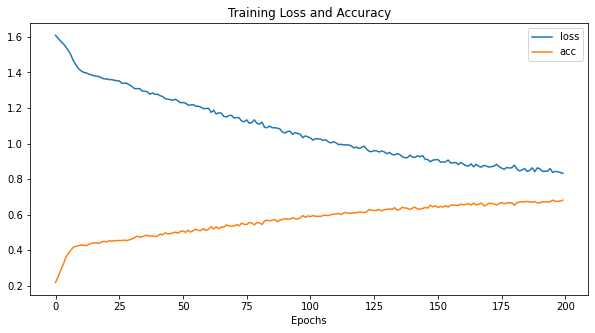

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Training Loss and Accuracy")
plt.plot(t_loss,label="loss")
plt.plot(t_acc,label="acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [ ]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]
    
  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

# Run inference on trained model with the validation set
inference(myModel, val_dl)

Accuracy: 0.49, Total items: 1562


# Yuto


- RNN?
- How well can i replicate the author's result?
- Kernel size
- Dynamic processing of augmentation? using without augmentation?
- another helpful -> using subsets
  - try classifying only two groups

- urban sound -> sound timbre is very different
- maybe in addition to spectrogram i should use other features.

- maybe its easier to classify between hassei of pro vs amateurs
- deep learning predicting -> qualitative evaluation

- 